# Prediciendo la diabetes
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

Procedemos a realizar:

    * Lectura de datos.
    * Verificacion y limpieza de datos.
    * Realizar visualizaciones de las variables.
    * Verificar la correlación de las variables.
    

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import seaborn as sns
import random

In [90]:
data_original = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
data_original.shape

(768, 9)

In [92]:
data_original.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [93]:
data_original.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [94]:
data_original.duplicated().sum()

0

In [95]:
data_original.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


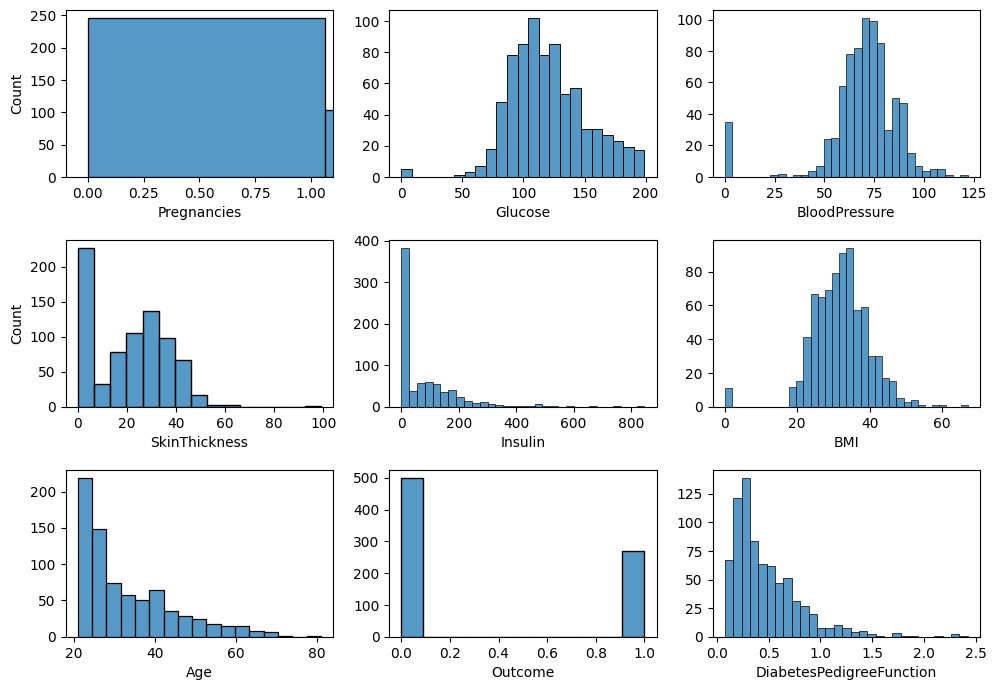

In [97]:
fig, axis = plt.subplots(3, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data_original, x = "Pregnancies").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = data_original, x = "Glucose").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = data_original, x = "BloodPressure").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data_original, x = "SkinThickness")
sns.histplot(ax = axis[1, 1], data = data_original, x = "Insulin").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = data_original, x = "BMI").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = data_original, x = "Age").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = data_original, x = "Outcome").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = data_original, x = "DiabetesPedigreeFunction").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [98]:
data_original.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

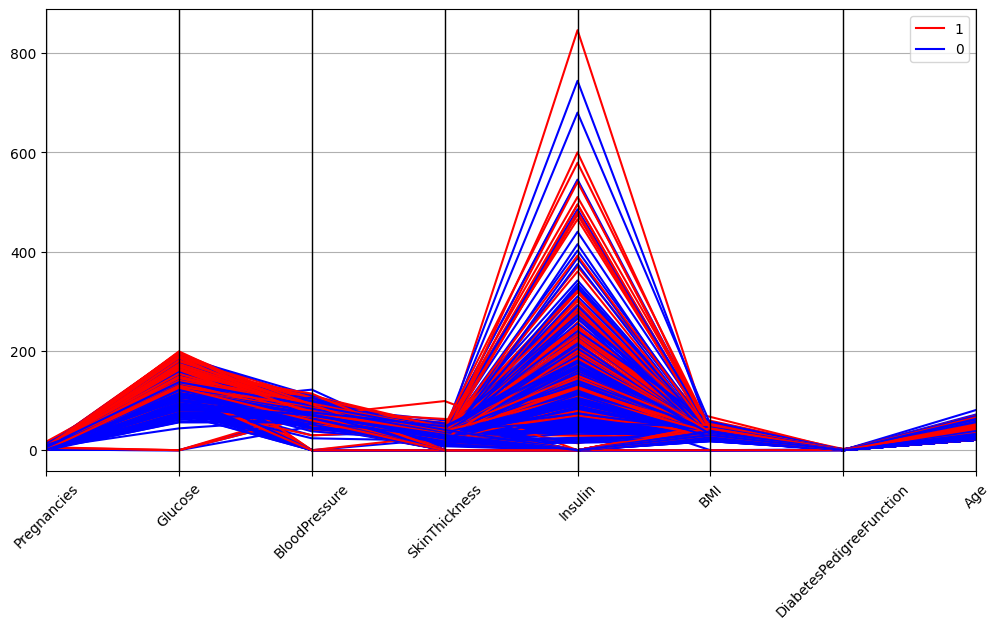

In [99]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_original, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [100]:
df_corr = data_original.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


### Pudimos observar las siguientes caracteristicas:

    - Todos las variables son numericas.
    - La correlación si bien es superior a 10% en 5 variables ,decidimos dejar todas las variables.

In [101]:
X = data_original.drop(['Outcome'], axis=1)
y = data_original['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Crear un árbol de decisión complejo
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

# Crear un árbol de decisión simple
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=42)
simple_tree.fit(X_train, y_train)

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define el modelo de árbol de decisión
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [1,3,4,5, 8, 10],  # You can specify different values to search
    'max_features': [(X_train.shape[1] // 2) ,(X_train.shape[1] // 2) + 1, (X_train.shape[1] // 2) + 2],
    'min_samples_leaf': [3, 5, 10,15],
}
# Create the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Create the optimal tree with the best hyperparameters
optimal_tree = DecisionTreeClassifier(**best_params, random_state=42)



##### Trabajaremos con estos hiperparametros encontrados por fuerza bruta, asi poder crear un modelo optimizado.

In [115]:
optimal_tree.fit(X_train, y_train)
train_pred_optimal= optimal_tree.predict(X_train)
test_pred_optimal = optimal_tree.predict(X_test)

In [116]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [117]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


### Las Metricas del modelo Complejo: 

    - Tiene una perfección en en grupo de entrenamiento.
    - La diferencia porcentual entre el grupo de testeo y entrenamiento, supera el 25% en todas las metricas observadas.

In [118]:
# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


### Las Metricas del modelo Simple:

    - Tiene una porcentaje mas ajustado.
    - La diferencia porcentual entre el grupo de testeo y entrenamiento es mucho menor que con el arbol complejo, pero aun la diferencia porcentual es importante.



In [119]:
# Métricas del modelo optimizado
get_metrics(y_train, y_test, train_pred_optimal, test_pred_optimal)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.809446,0.672269,0.751765,0.833333,0.563380,0.940150
Test,0.759740,0.610526,0.708081,0.725000,0.527273,0.888889
Diferencia,0.049706,0.061743,0.043684,0.108333,0.036108,0.051261


### Las Metricas del modelo Optimizado:

    - Se obsera un mejor desempeño tamto en el grupo de testeo como el de entrenamiento.
    - La diferencia porcentual tiene niveles mucho mas reducidos, indicando que el modelo tiene un mejor desempeño.

In [120]:
# Matriz de confusión
confusion_matrix(y_test, test_pred_simple)

array([[57, 42],
       [14, 41]])

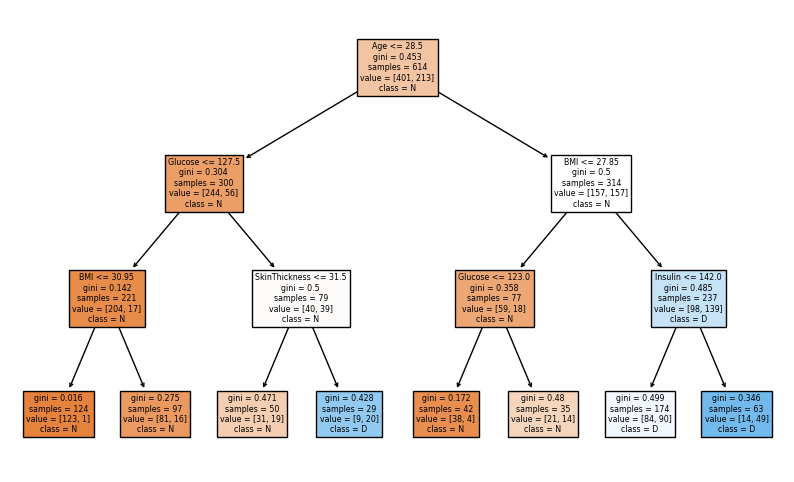

In [121]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['N','D'], filled=True)
plt.savefig("Plot Arbol Simple.png", dpi=500)
plt.show()

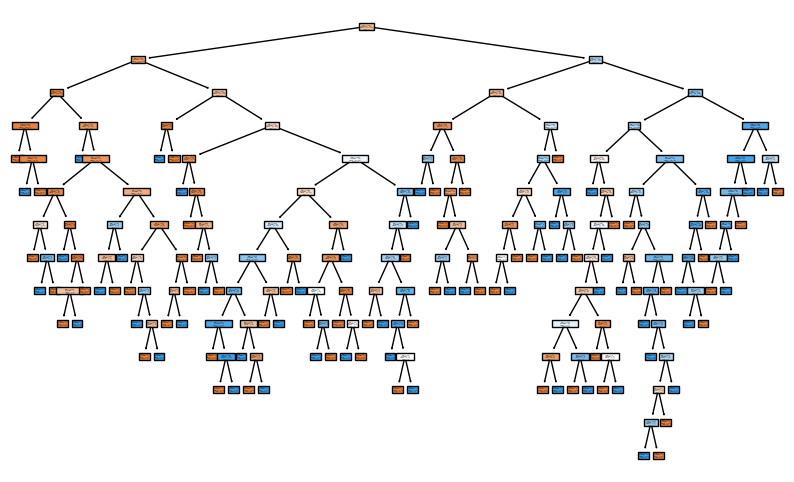

In [122]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(complex_tree, feature_names=X_train.columns, class_names=['N','D'], filled=True)
plt.savefig("Plot Arbol Complejo.png", dpi=500)
plt.show()

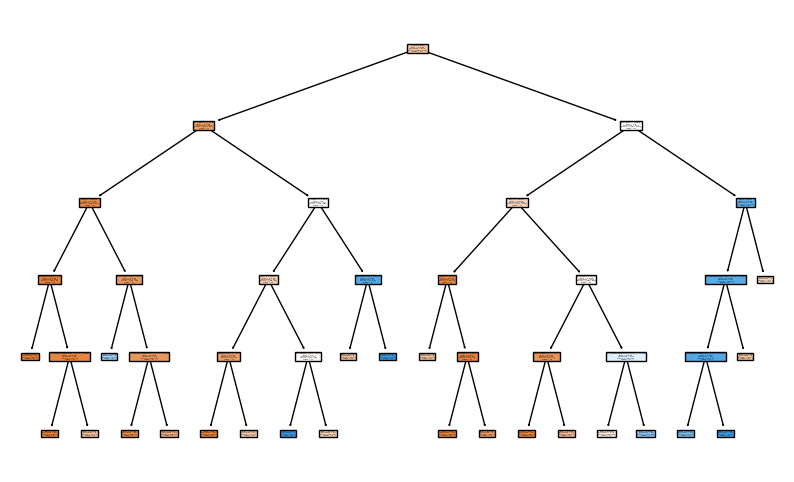

In [123]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(optimal_tree, feature_names=X_train.columns, class_names=['N','D'], filled=True)
plt.savefig("Plot Arbol Optimizado.png", dpi=500)
plt.show()

In [124]:
from pickle import dump

dump(optimal_tree, open("/workspaces/Arbol/models/model.pkl", "wb"))
